In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import ast
import re

In [ ]:
# Charger le nouveau dataset
recipe = pd.read_csv("recipe/6_recipe_with_steps_complexity.csv")
print(recipe.columns)
print(recipe.shape)

Index(['id', 'n_ingredients', 'n_steps', 'minutes', 'steps',
       'avg_words_per_step'],
      dtype='object')
(221813, 6)


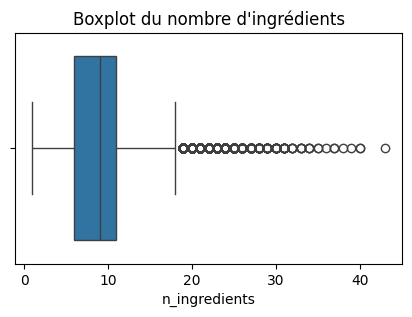

In [4]:
# Afficher la boîte à moustaches pour la variable 'n_ingredients'
plt.figure(figsize=(5, 3))
sns.boxplot(x='n_ingredients', data=recipe)
plt.title("Boxplot du nombre d'ingrédients")
plt.xlabel("n_ingredients")
plt.show()

Remarque : 
- Beaucoup de recettes ont plus de 20 ingrédients.

In [ ]:
# Afficher le n_ingredients minimum, maximum
print("n_ingredients min:", recipe['n_ingredients'].min())
print("n_ingredients max:", recipe['n_ingredients'].max())
# Afficher le nombre de recettes avec 0 n_ingredients
print("Nombre de recettes avec 1 n_ingredients:", recipe[recipe['n_ingredients'] == 1].shape[0])
# Afficher l'ingrédient d'une recette avec 1 n_ingredients
print("Ingrédient d'une recette avec 1 n_ingredients:", recipe[recipe['n_ingredients'] == 1]['ingredients'].iloc[0])
# Afficher les instructions d'une seule recette avec 1 n_ingredients
recette_1_ingredient = recipe[recipe['n_ingredients'] == 1]['steps'].iloc[0]
print("Instructions d'une seule recette avec 1 n_ingredients:")
print(recette_1_ingredient)

n_ingredients min: 1
n_ingredients max: 43
Nombre de recettes avec 1 n_ingredients: 25
Ingrédient d'une recette avec 1 n_ingredients: ['apple cider']
Instructions d'une seule recette avec 1 n_ingredients:
['in 6-8 quart stock pan , measure out 2 cups of apple cider', 'this will be approximately how much you will end up with when finished', 'pour in the remaining apple cider', 'if it is kept on an unrefrigerated store shelf , do not use it', 'place on stove top on medium heat and bring to a low boil', 'cook over medium approximately 2-1 / 2 hours', 'stir occasionally', 'as the cider begins to get close to desired level of reduction , the bubbles will get smaller & the boil will look somewhat foamy', 'youll need to reduce the heat slightly at this point so that it doesnt boil up or scorch', 'remove from stove and let cool', 'cider should be thick - almost like corn syrup or molasses when done', 'pour into covered container of your choice', 'store in refrigerator and use as desired']


Nous avons décider d'enlever aucun outliers. Ces recettes ne semblent pasêtre des erreurs.

Nous pouvons proposer une nouvelle variable qui catégorise le nombre d'ingrédients par recette en : Petit, Moyen, Grand.

Nous allons pour faire cette catégorisation nous appuyer sur les percentiles (ce qui permet de diviser les données en portions égales basées sur la distribution réelle). Ou sur notre choix intuitif.

Choix intuitif :

In [ ]:
# Création d'une variable recette Petit, Moyen, Grand

def categorize_prep_time(n_ingredients):
    if n_ingredients <= 5:
        return 'Petit'
    elif 6 <= n_ingredients <= 10:
        return 'Moyen'
    else:
        return 'Grand'
# Ajout de la nouvelle variable au dataset
recipe['category_n_ingredient'] = recipe['n_ingredients'].apply(categorize_prep_time)

Choix percentiles :

In [ ]:
# Catégorisation basée sur les percentiles
def categorize_n_ingredients_percentiles(recipe_data):
    q33 = recipe_data['n_ingredients'].quantile(0.33)
    q67 = recipe_data['n_ingredients'].quantile(0.67)
    
    def assign_category(minutes):
        if minutes < q33:
            return 'Petit'
        elif q33 <= minutes < q67:
            return 'Moyen'
        else:
            return 'Grand'
    
    recipe_data['category_n_ingredients_balanced'] = recipe_data['n_ingredients'].apply(assign_category)

    print(f"   • Petit: < {q33:.0f} n_ingredients")
    print(f"   • Moyen: {q33:.0f} - {q67:.0f} n_ingredients")
    print(f"   • Grand: > {q67:.0f} n_ingredients")
    
    return recipe_data

In [ ]:
# Sauvegarder le nouveau dataset
#recipe = categorize_n_ingredients_percentiles(recipe)
#recipe.to_csv("recipe/7_recipe_n_ingredients_category.csv", index=False)

In [ ]:
# Calcul de statistiques descriptives de la colonne 'minutes'
print(recipe['n_ingredients'].describe())
print("Skewness : ", recipe['n_ingredients'].skew())
print("Kurtosis : ", recipe['n_ingredients'].kurt())
# Vérifier s'il y a besoin de faire un log pour calculer le score d'effort

count    221813.000000
mean          9.037392
std           3.720589
min           1.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          43.000000
Name: n_ingredients, dtype: float64
Skewness :  0.7644668264466581
Kurtosis :  1.1593912208919543
